# first step cleaning the dataset from any non sense values like negative humidity and wind speed and there where no dup and null values 

In [5]:
import pandas as pd

data = pd.read_csv("mobilis_data.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')
data_cleaned = data_cleaned.drop_duplicates()


valid_ranges = {
    'Temperature': (-40, float('inf')), 
    'Humidity': (0, 100),      
    'Power_Consumption': (0, float('inf')),  
    'Wind_Speed': (0, float('inf')), 
    'SINR': (0, float('inf')),  
    'Signal_Strength':(0,float('inf')),
    'Voltage': (0, float('inf')),  
    'Latitude': (-90, 90),  
    'Longitude': (-180, 180), 
}

invalid_rows = []

for column, (min_value, max_value) in valid_ranges.items():
    if column in data_cleaned.columns:
        invalid_rows.append(data_cleaned[(data_cleaned[column] < min_value) | (data_cleaned[column] > max_value)])

invalid_rows_df = pd.concat(invalid_rows)

data_cleaned = data_cleaned[~data_cleaned.index.isin(invalid_rows_df.index)]

description = data_cleaned.describe()

categorical_description = data_cleaned[['Status', 'Firmware_Version']].describe()

print("Cleaned Data:")
print(data_cleaned.head())

print("\nAffected (Invalid) Rows:")
print(invalid_rows_df)

print("\nDescriptive Statistics (Numerical):")
print(description)

print("\nDescriptive Statistics (Categorical):")
print(categorical_description)
data_cleaned.to_csv("mobilis_data_cleaned.csv", index=False)

/var/folders/4t/vgrmglh57ds018mbdc9875y80000gn/T/ipykernel_19404/2410818314.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')


Cleaned Data:
  Antenna_ID                   Datetime  Temperature  Signal_Strength  \
1    ANT-044 2021-01-01 00:03:00.329143        45.92            46.15   
2    ANT-074 2021-01-01 00:06:00.658286        75.34            48.36   
3    ANT-013 2021-01-01 00:09:00.987429        51.08            43.66   
4    ANT-091 2021-01-01 00:12:01.316572        67.20            35.63   
5    ANT-045 2021-01-01 00:15:01.645715        45.61            43.97   

   Humidity  Power_Consumption  Wind_Speed   SINR  Traffic  Downtime  \
1     63.53             882.71        8.74  17.70   462.95     21.52   
2     69.04             691.99       17.38  21.39   739.38     16.49   
3     81.32            1118.12        2.97   1.45   429.94      5.55   
4     30.22            1395.63        6.34  13.14   525.45     20.28   
5     34.07             949.72       15.70  10.08   635.96     21.59   

  Firmware_Version  Voltage   Latitude  Longitude   Status  
1           FW-5.0    12.28  35.787215   7.289380  Wa

# Exploring Feature Selection Through Correlation Analysis, Box Plots, and Violin Plots 

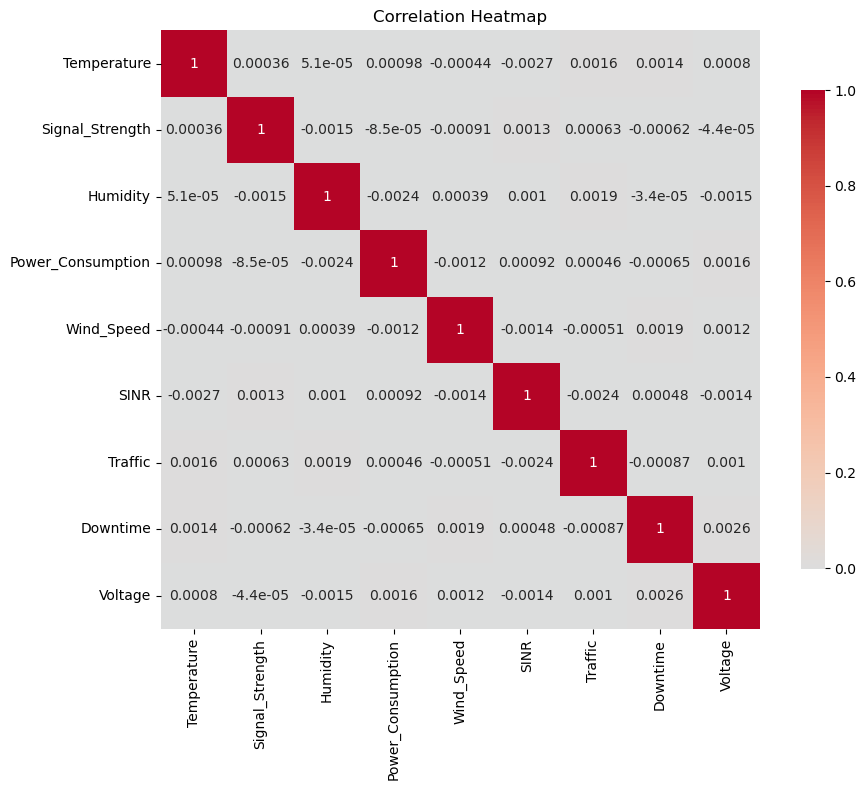

In [5]:
# Create a figure for the correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap', fontsize=12)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()


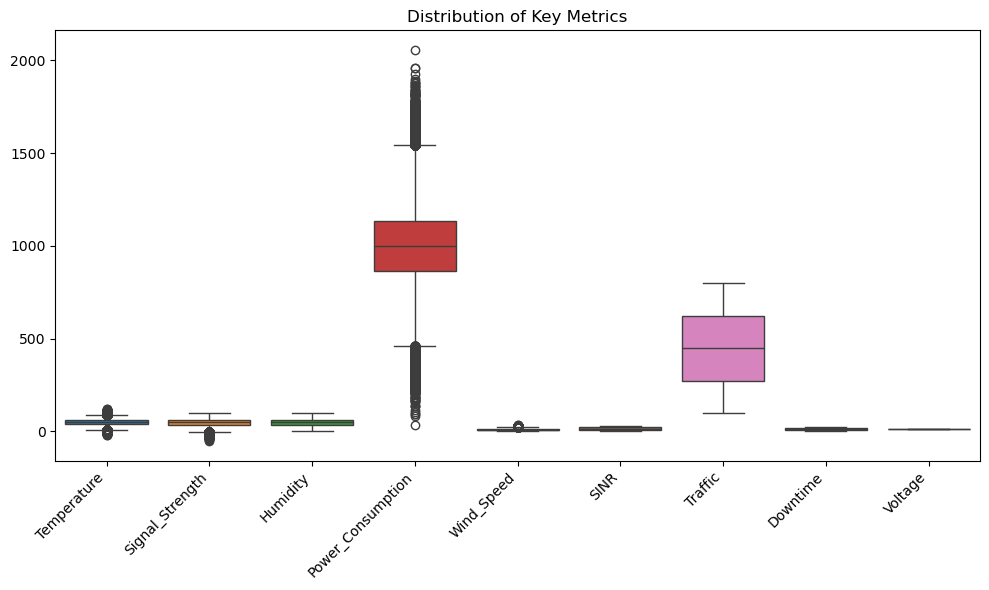

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("mobilis_data_cleaned.csv")

# Create a figure for the boxplot
plt.figure(figsize=(10, 6))
metrics = ['Temperature', 'Signal_Strength', 'Humidity', 'Power_Consumption', 
           'Wind_Speed', 'SINR', 'Traffic', 'Downtime', 'Voltage']
sns.boxplot(data=data[metrics])
plt.title('Distribution of Key Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribution_of_key_metrics.png', dpi=300)
plt.show()


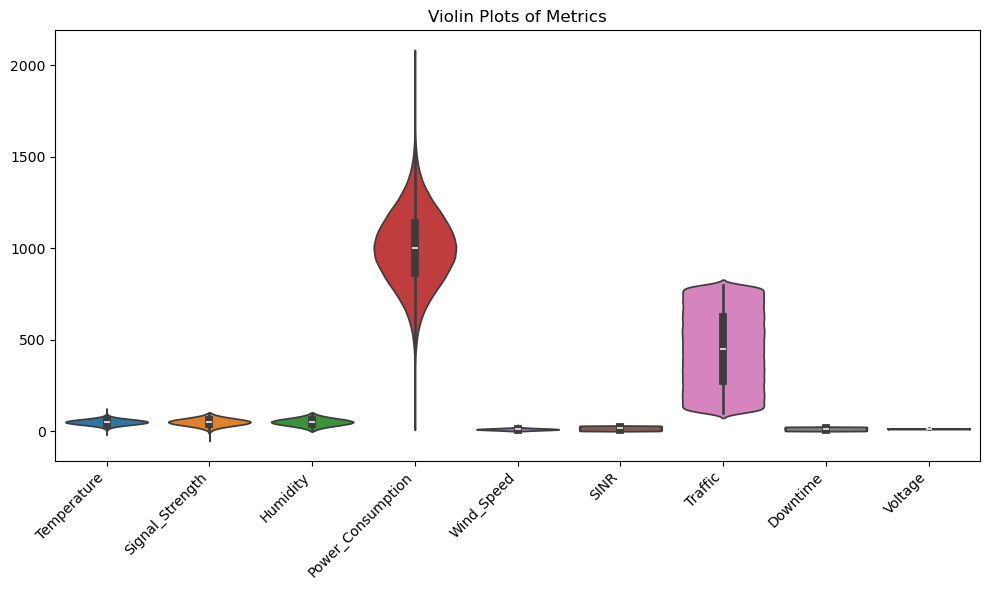

In [6]:
# Create a figure for the violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[metrics])
plt.title('Violin Plots of Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('violin_plots_of_metrics.png', dpi=300)
plt.show()


# discovering weird relation between Downtime and Traffic they appear like the picture 

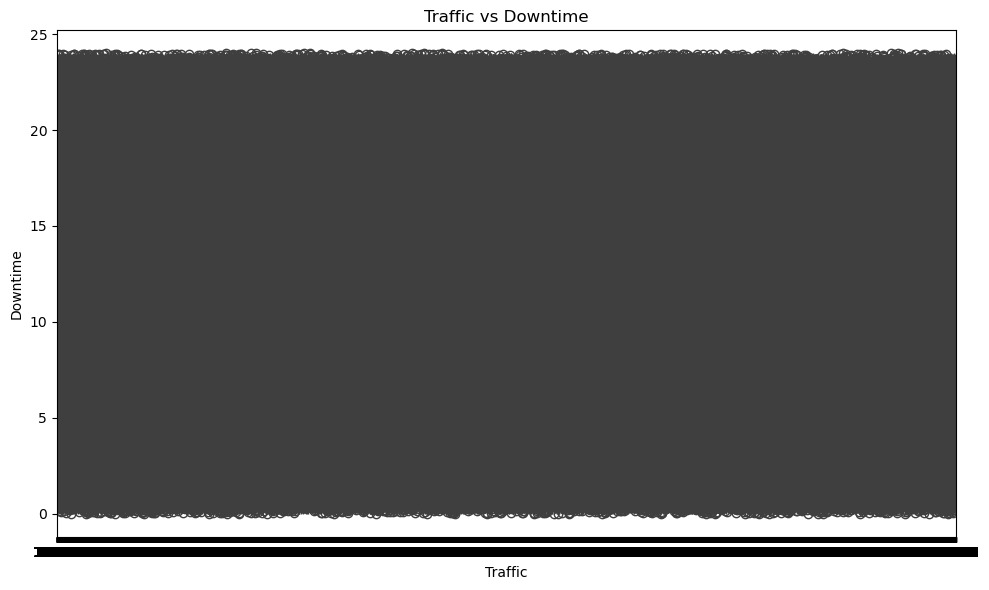

In [8]:
# Create a box plot for Traffic vs Downtime
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic', y='Downtime', data=data)
plt.title('Traffic vs Downtime', fontsize=12)
plt.tight_layout()
plt.savefig('traffic_vs_downtime.png', dpi=300)
plt.show()


# The spread of data suggests no clear linear relationship

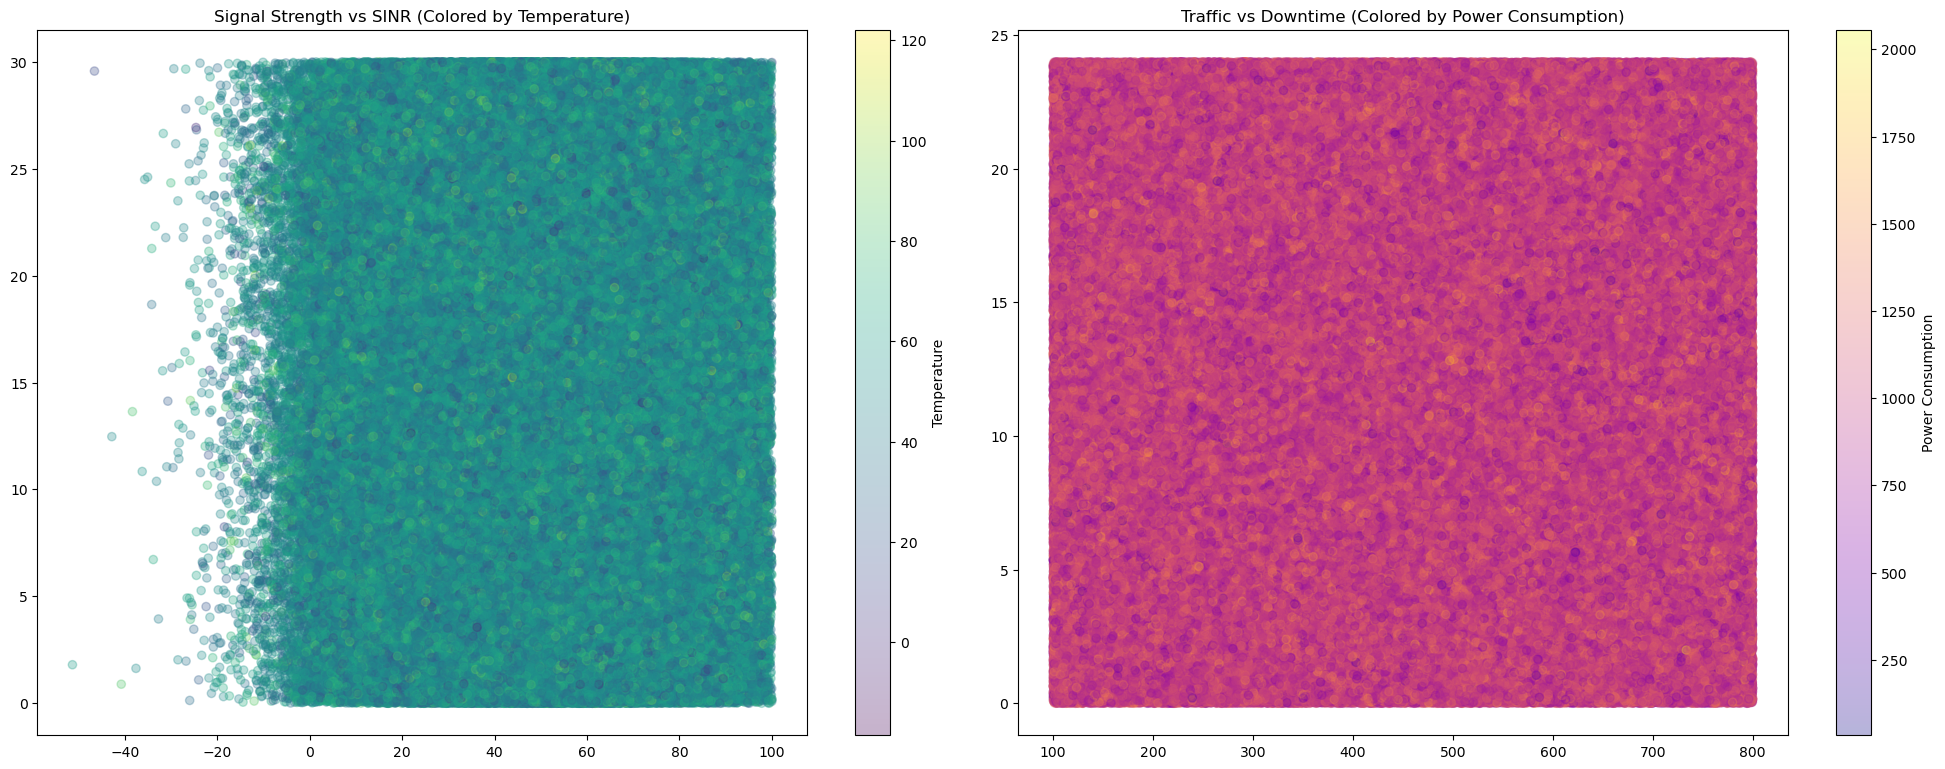

In [10]:
# Scatter plots with more details
plt.figure(figsize=(20, 15))

# Signal Strength vs SINR colored by Temperature
plt.subplot(2, 2, 1)
plt.scatter(data['Signal_Strength'], data['SINR'], 
            alpha=0.3, c=data['Temperature'], cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Signal Strength vs SINR (Colored by Temperature)')

# Traffic vs Downtime colored by Power Consumption
plt.subplot(2, 2, 2)
plt.scatter(data['Traffic'], data['Downtime'], 
            alpha=0.3, c=data['Power_Consumption'], cmap='plasma')
plt.colorbar(label='Power Consumption')
plt.title('Traffic vs Downtime (Colored by Power Consumption)')

# Final adjustments and save the figure
plt.tight_layout()
plt.savefig('detailed_scatter_plots.png', dpi=300)
plt.show()



Visualizing Continuous Feature: Traffic



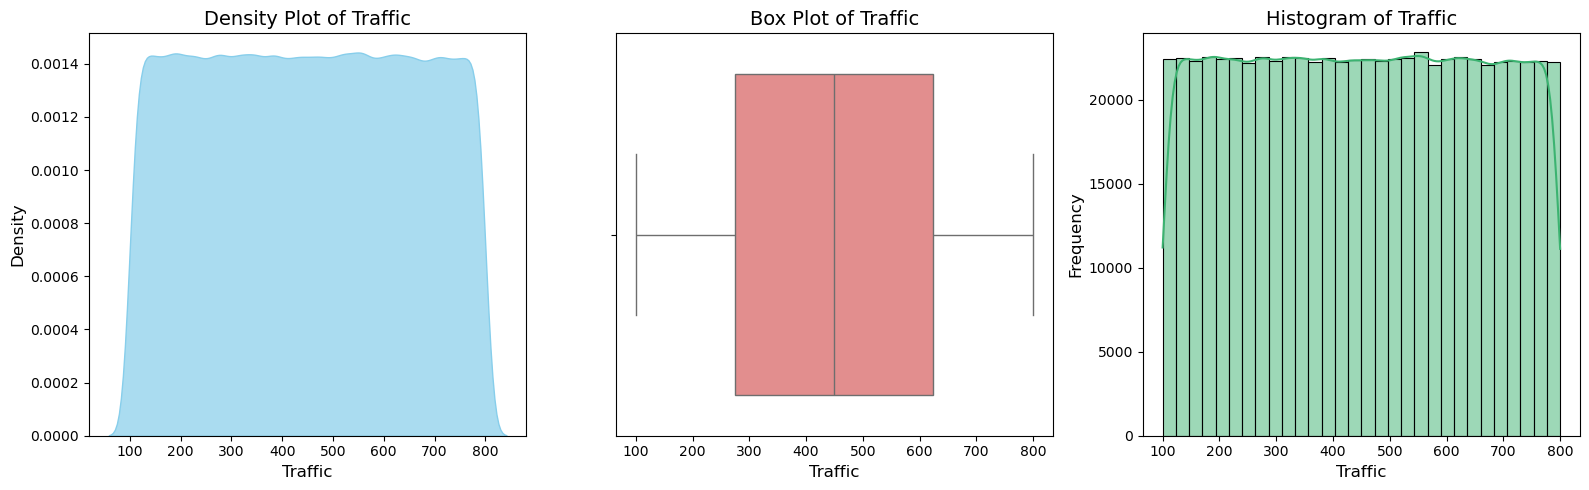


Visualizing Continuous Feature: Downtime



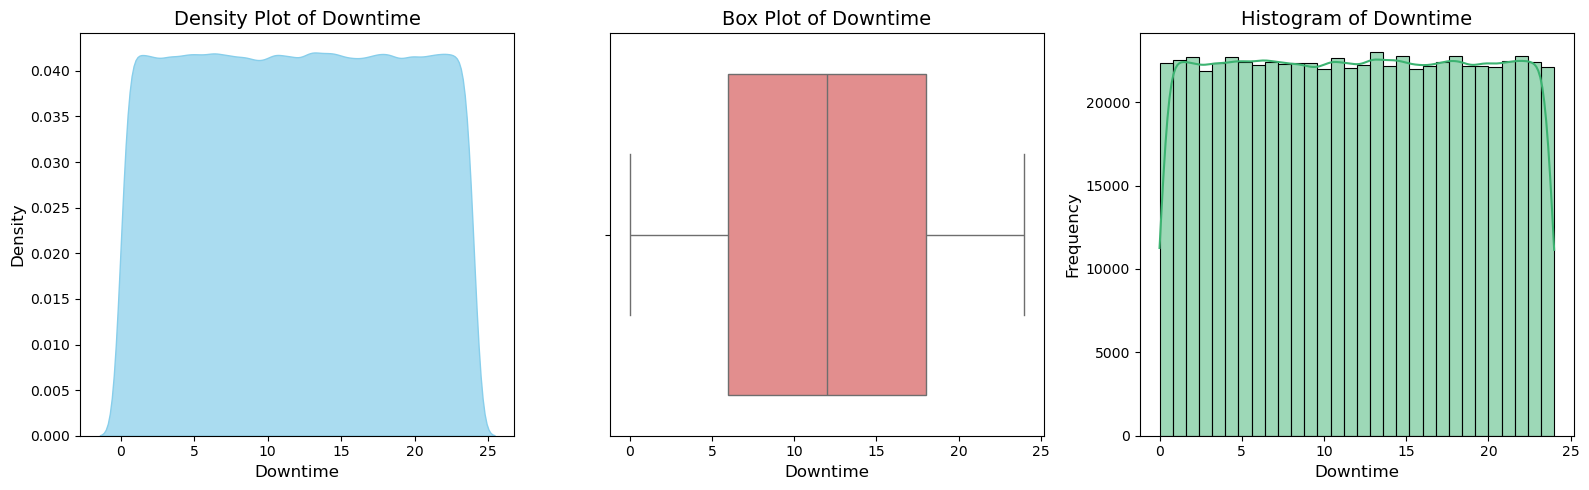

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize continuous attributes
def visualize_continuous(data, column):
    plt.figure(figsize=(16, 5))
    
    # Subplot 1: Density Plot
    plt.subplot(1, 3, 1)
    sns.kdeplot(data[column], fill=True, color='skyblue', alpha=0.7)
    plt.title(f'Density Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Subplot 2: Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

    # Subplot 3: Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(data[column], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.tight_layout()
    plt.show()

# Function to visualize categorical attributes
def visualize_categorical(data, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for column in ["Traffic","Downtime"]:
    if data[column].dtype in ['int64', 'float64']:  
        print(f"\nVisualizing Continuous Feature: {column}\n")
        visualize_continuous(data, column)
    else:  # Categorical variables
        print(f"\nVisualizing Categorical Feature: {column}\n")
        visualize_categorical(data, column)

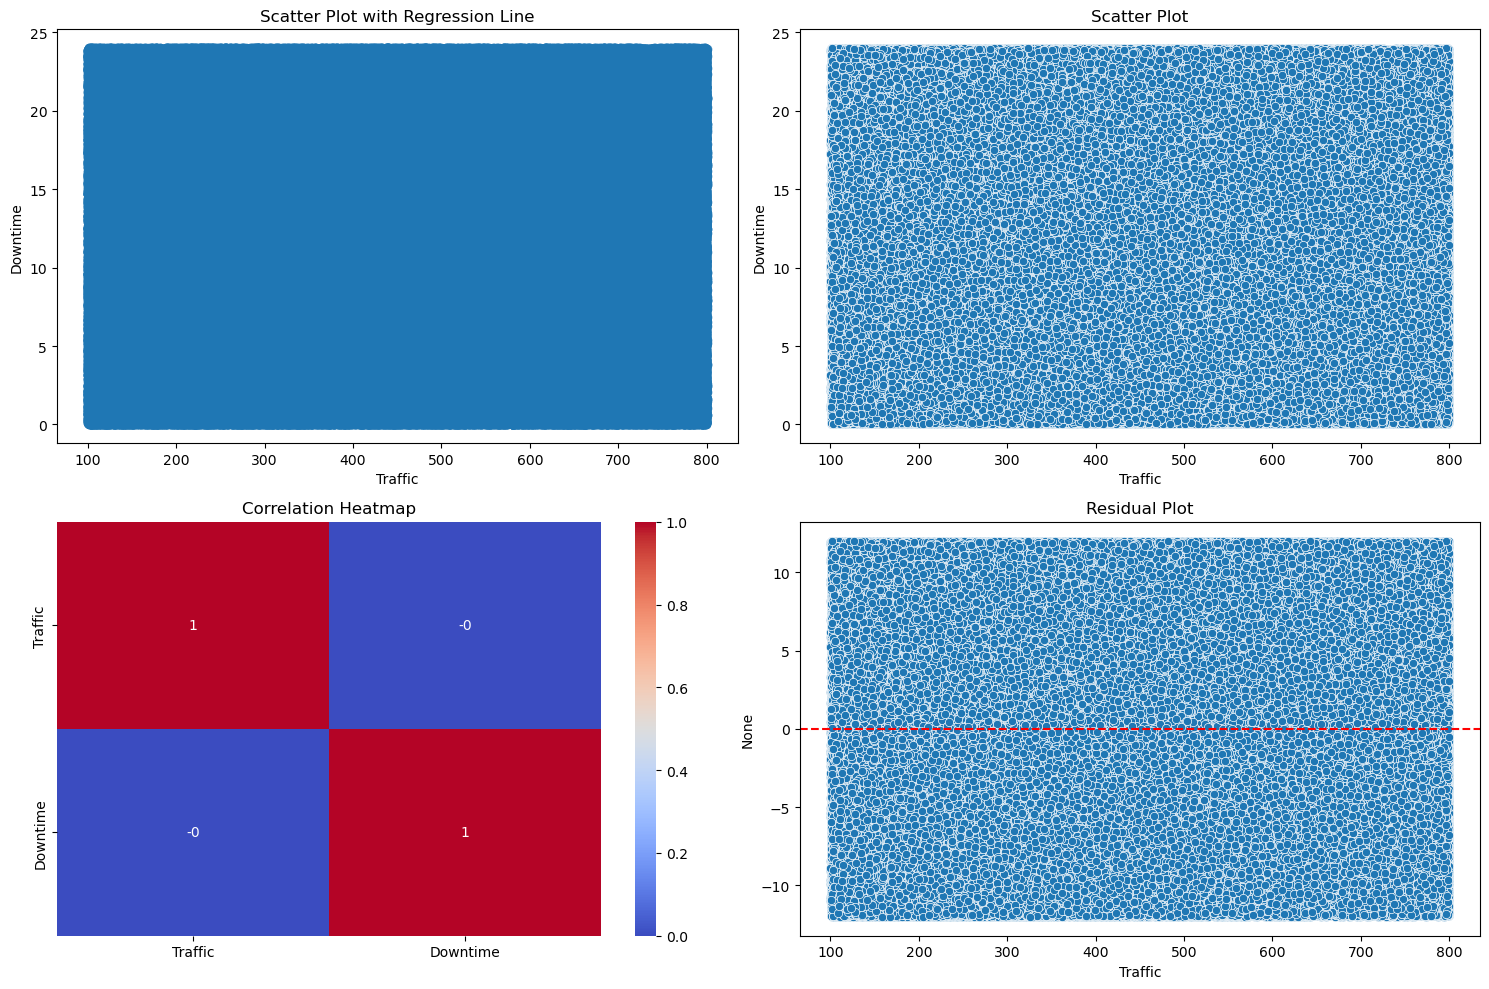


Statistical Results:
Pearson Correlation: -0.0009
Spearman Correlation: -0.0009
R-squared: 0.0000
P-value: 0.4762
Slope: -0.0000
Intercept: 12.0100
Standard Error: 0.0000


In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_relationship(traffic, downtime):
    """
    Analyze the relationship between traffic and downtime using various statistical methods
    """
    # Create DataFrame
    df = pd.DataFrame({
        'Traffic': traffic,  
        'Downtime': downtime  
    })
    
    try:
        # 1. Calculate Correlation Coefficients
        pearson_corr = df['Traffic'].corr(df['Downtime'])
        spearman_corr = df['Traffic'].corr(df['Downtime'], method='spearman')
        
        # 2. Perform Linear Regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['Traffic'], df['Downtime'])
        
        # 3. Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Scatter plot with regression line
        sns.regplot(data=df, x='Traffic', y='Downtime', ax=axes[0,0])
        axes[0,0].set_title('Scatter Plot with Regression Line')
        
        # Joint plot (combines scatter plot and histograms)
        sns.scatterplot(data=df, x='Traffic', y='Downtime', ax=axes[0,1])
        axes[0,1].set_title('Scatter Plot')
        
        # Heatmap of correlation matrix
        sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', ax=axes[1,0])
        axes[1,0].set_title('Correlation Heatmap')
        
        # Residual plot
        y_pred = slope * df['Traffic'] + intercept
        residuals = df['Downtime'] - y_pred
        sns.scatterplot(x=df['Traffic'], y=residuals, ax=axes[1,1])
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_title('Residual Plot')
        
        plt.tight_layout()
        
        # 4. Calculate additional statistics
        stats_dict = {
            'Pearson Correlation': pearson_corr,
            'Spearman Correlation': spearman_corr,
            'R-squared': r_value**2,
            'P-value': p_value,
            'Slope': slope,
            'Intercept': intercept,
            'Standard Error': std_err
        }
        
        return fig, stats_dict
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check that your data columns are named 'Traffic' and 'Downtime' (case-sensitive)")
        return None, None

# Example usage:
try:
    fig, stats = analyze_relationship(traffic=data["Traffic"], downtime=data["Downtime"])
    if fig is not None:
        plt.show()
        print("\nStatistical Results:")
        for key, value in stats.items():
            print(f"{key}: {value:.4f}")
except Exception as e:
    print(f"Error in main execution: {str(e)}")

# Feature Importance Analysis: Validating Assumptions 

/var/folders/4t/vgrmglh57ds018mbdc9875y80000gn/T/ipykernel_19404/418994046.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')


Feature Importance:
              Feature  Importance
7             Traffic    0.434944
6                SINR    0.197905
1         Temperature    0.171630
2     Signal_Strength    0.138423
3            Humidity    0.047752
4   Power_Consumption    0.000924
5          Wind_Speed    0.000916
11           Latitude    0.000912
12          Longitude    0.000900
8            Downtime    0.000869
10            Voltage    0.000814
0          Antenna_ID    0.000719
17             Minute    0.000672
18             Second    0.000640
15                Day    0.000565
16               Hour    0.000535
14              Month    0.000404
9    Firmware_Version    0.000255
13               Year    0.000222


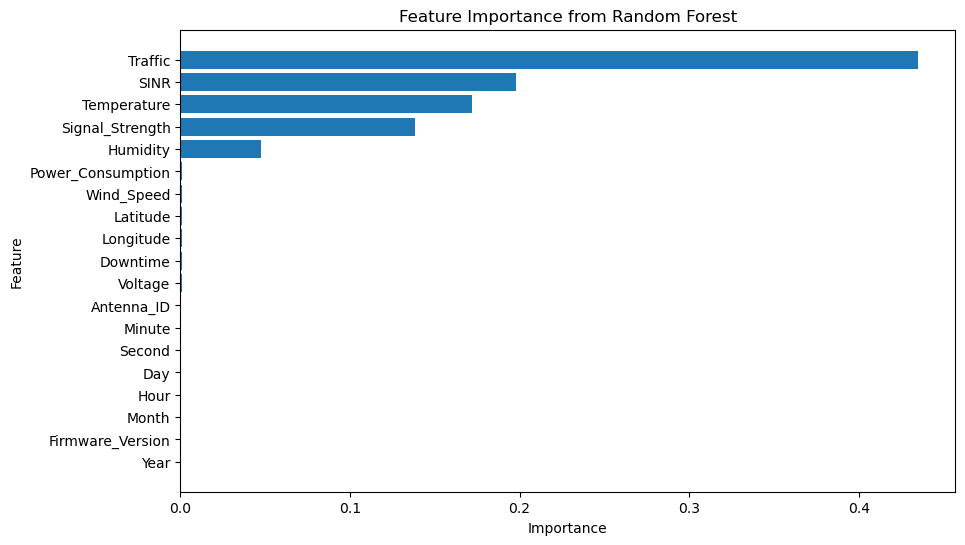

In [8]:
import pandas as p
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("mobilis_data.csv")


data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')


data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour
data['Minute'] = data['Datetime'].dt.minute
data['Second'] = data['Datetime'].dt.second


data.drop(columns=['Datetime'], inplace=True)


label_encoders = {}
for col in ['Antenna_ID', 'Firmware_Version', 'Status']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


data.fillna(data.median(numeric_only=True), inplace=True)  # Fill NaNs in numerical columns with median
data.fillna(data.mode().iloc[0], inplace=True)  # Fill NaNs in categorical columns with most frequent value

# Separate features and target variable
X = data.drop(columns=['Status'])  
y = data['Status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


importance_df.to_csv("feature_importance.csv", index=False)


print("Feature Importance:")
print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()

# Training with different attributes to assess the high correlation and the redundancy of certain attributes

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

def convert_to_tf_dataset(X, y):
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))
    dataset = dataset.batch(1024)
    return dataset

def prepare_data(df, features, target='Status'):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    train_dataset = convert_to_tf_dataset(X_train, y_train)
    val_dataset = convert_to_tf_dataset(X_val, y_val)
    test_dataset = convert_to_tf_dataset(X_test, y_test)

    return train_dataset, val_dataset, test_dataset, y_test

def train_and_evaluate_rf(train_dataset, val_dataset, test_dataset, y_test, class_weights_dict, strategy):
    with strategy.scope():
        model = tfdf.keras.RandomForestModel(
            num_trees=30,
            max_depth=7,
            min_examples=2,
            task=tfdf.keras.Task.CLASSIFICATION,
            random_seed=42
        )
        model.compile(metrics=["accuracy"])

    model.fit(train_dataset, validation_data=val_dataset, class_weight=class_weights_dict, verbose=1)

    val_evaluation = model.evaluate(val_dataset, return_dict=True)
    print("Validation Accuracy:", val_evaluation["accuracy"])

    test_evaluation = model.evaluate(test_dataset, return_dict=True)
    print("Test Accuracy:", test_evaluation["accuracy"])

    y_pred = model.predict(test_dataset)
    y_pred = np.argmax(y_pred, axis=1)

    print("\nClassification Report on Test Dataset:")
    print(classification_report(y_test, y_pred, target_names=['Failure', 'Normal', 'Warning']))

    print("\nConfusion Matrix on Test Dataset:")
    print(confusion_matrix(y_test, y_pred))

    return val_evaluation["accuracy"], test_evaluation["accuracy"]

def compare_feature_sets(df, feature_sets, class_weights_dict, strategy):
    results = {}
    for key, features in feature_sets.items():
        print(f"\nTraining with feature set: {key}")
        train_ds, val_ds, test_ds, y_test = prepare_data(df, features)
        val_acc, test_acc = train_and_evaluate_rf(train_ds, val_ds, test_ds, y_test, class_weights_dict, strategy)
        results[key] = {'Validation Accuracy': val_acc, 'Test Accuracy': test_acc}
    return results

# Setup and preprocessing
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    print("TPU not found. Running on CPU/GPU.")
    strategy = tf.distribute.get_strategy()

# Read and preprocess data
df = pd.read_csv("/content/mobilis_data_cleaned.csv")
df['Antenna_ID'] = LabelEncoder().fit_transform(df['Antenna_ID'])
df['Status'] = LabelEncoder().fit_transform(df['Status'])
df['Firmware_Version'] = LabelEncoder().fit_transform(df['Firmware_Version'])


# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(df['Status']), y=df['Status'])
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weights_dict)

# Define feature sets
features_base = ['SINR', 'Signal_Strength', 'Traffic', 'Temperature']
features_with_power_downtime = features_base + ['Power_Consumption', 'Downtime']
features_with_humidity = features_base + ['Humidity']
features_all = features_with_power_downtime + ['Humidity']

feature_sets = {
    "Base Features": features_base,
    "With Power Consumption and Downtime": features_with_power_downtime,
    "With Humidity": features_with_humidity,
    "With All Features": features_all
}

# Run comparison
print("\nComparing feature sets...")
results = compare_feature_sets(df, feature_sets, class_weights_dict, strategy)

print("\nFeature Set Comparison Results:")
for feature_set, metrics in results.items():
    print(f"{feature_set}:")
    print(f"  Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")

TPU not found. Running on CPU/GPU.
Class Weights: {0: 0.5535334290097491, 1: 4.121695071395671, 2: 1.0517395392571698}

Comparing feature sets...

Training with feature set: Base Features
Use /tmp/tmpwfs4ywzt as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.994721. Found 429513 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
Validation dataset read in 0:00:02.737767. Found 107379 examples.
Training model...
Model trained in 0:00:22.671659
Compiling model...
Model compiled.
105/105 [==============================] - 2s 16ms/step - loss: 0.0000e+00 - accuracy: 0.9800
Validation Accuracy: 0.9800426363945007
132/132 [==============================] - 3s 18ms/step - loss: 0.0000e+00 - accuracy: 0.9803
Test Accuracy: 0.9803386926651001
132/132 [==============================] - 2s 15ms/step

Classification Report on Test Dataset:
              precision    recall  f1-score   support

     Fa

Training dataset read in 0:00:01.366965. Found 429513 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
Validation dataset read in 0:00:00.569073. Found 107379 examples.
Training model...
Model trained in 0:00:16.546052
Compiling model...
Model compiled.
105/105 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 0.999990701675415
132/132 [==============================] - 2s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 1.0
132/132 [==============================] - 2s 11ms/step

Classification Report on Test Dataset:
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00     80679
      Normal       1.00      1.00      1.00     10889
     Warning       1.00      1.00      1.00     42655

    accuracy                           1.00    134223
   macro avg       1.00      1.00      1.00    134223
weighted avg       1.00      1.00      1.00    134223


Confusion Matrix on Test Dataset:
[[80679     0     0]
 [   

# using elbow method to get the best number of trees 

TPU not found. Running on CPU/GPU.
Training models with different numbers of trees...
Use /tmp/tmpd9en1ne1 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9642
Number of trees: 10, Validation Accuracy: 0.9642
Use /tmp/tmpm_5462r1 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9642
Number of trees: 20, Validation Accuracy: 0.9642
Use /tmp/tmp96k4ozl7 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)


105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Number of trees: 30, Validation Accuracy: 0.9832
Use /tmp/tmpg1cvwo5m as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)


105/105 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Number of trees: 40, Validation Accuracy: 0.9832
Use /tmp/tmpedfc41v_ as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Number of trees: 50, Validation Accuracy: 0.9832
Use /tmp/tmpzifqf340 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Number of trees: 60, Validation Accuracy: 0.9832
Use /tmp/tmpcnwaxo3o as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Number of trees: 70, Validation Accuracy: 0.9832
Use /tmp/tmpxb_osqeb as temporary training directory
Num validation example

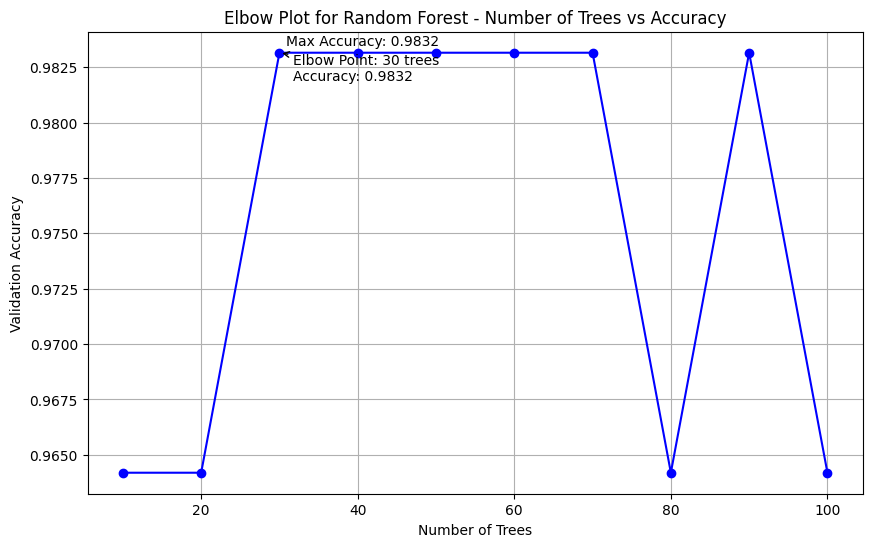


Analysis Results:
Optimal number of trees (elbow point): 30
Accuracy at elbow point: 0.9832
Maximum accuracy achieved: 0.9832 with 30 trees


In [8]:

# Check for TPU and set up strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    print("TPU not found. Running on CPU/GPU.")
    strategy = tf.distribute.get_strategy()

# Load and preprocess the data
df = pd.read_csv("/content/mobilis_data_cleaned.csv")
df['Status'] = LabelEncoder().fit_transform(df['Status'])
df['Firmware_Version'] = LabelEncoder().fit_transform(df['Firmware_Version'])
df['Antenna_ID'] = LabelEncoder().fit_transform(df['Antenna_ID'])

def train_rf_with_params(train_dataset, val_dataset, num_trees, max_depth, min_examples):
    with strategy.scope():
        model = tfdf.keras.RandomForestModel(
            num_trees=num_trees,
            max_depth=max_depth,
            min_examples=min_examples,
            task=tfdf.keras.Task.CLASSIFICATION,
            random_seed=42
        )
        model.compile(metrics=["accuracy"])

    model.fit(train_dataset, validation_data=val_dataset, verbose=0)
    val_evaluation = model.evaluate(val_dataset, return_dict=True)
    return val_evaluation["accuracy"]

# Prepare the data with humidity features
features_with_humidity = ['SINR', 'Signal_Strength', 'Traffic', 'Temperature', 'Humidity']
X = df[features_with_humidity]
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert to TF datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values)).batch(1024)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values)).batch(1024)

# Test different numbers of trees
num_trees_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracies = []

print("Training models with different numbers of trees...")
for n_trees in num_trees_range:
    accuracy = train_rf_with_params(
        train_dataset,
        val_dataset,
        num_trees=n_trees,
        max_depth=7,
        min_examples=2
    )
    accuracies.append(accuracy)
    print(f"Number of trees: {n_trees}, Validation Accuracy: {accuracy:.4f}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, 'bo-')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Elbow Plot for Random Forest - Number of Trees vs Accuracy')
plt.grid(True)

# Add annotations for key points
max_accuracy_idx = np.argmax(accuracies)
plt.annotate(f'Max Accuracy: {accuracies[max_accuracy_idx]:.4f}',
             xy=(num_trees_range[max_accuracy_idx], accuracies[max_accuracy_idx]),
             xytext=(5, 5), textcoords='offset points')

# Calculate the elbow point using the maximum curvature method
def find_elbow_point(x, y):
    npoints = len(x)
    all_coords = np.vstack((x, y)).T
    line_vec = all_coords[-1] - all_coords[0]
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    vec_from_first = all_coords - all_coords[0]
    scalar_prod = np.sum(vec_from_first * np.tile(line_vec_norm, (npoints, 1)), axis=1)
    vec_from_line = vec_from_first - np.outer(scalar_prod, line_vec_norm)
    dist_from_line = np.sqrt(np.sum(vec_from_line**2, axis=1))
    elbow_idx = np.argmax(dist_from_line)
    return elbow_idx

elbow_idx = find_elbow_point(num_trees_range, accuracies)
plt.annotate(f'Elbow Point: {num_trees_range[elbow_idx]} trees\nAccuracy: {accuracies[elbow_idx]:.4f}',
             xy=(num_trees_range[elbow_idx], accuracies[elbow_idx]),
             xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.show()

# Print the final recommendations
print("\nAnalysis Results:")
print(f"Optimal number of trees (elbow point): {num_trees_range[elbow_idx]}")
print(f"Accuracy at elbow point: {accuracies[elbow_idx]:.4f}")
print(f"Maximum accuracy achieved: {accuracies[max_accuracy_idx]:.4f} with {num_trees_range[max_accuracy_idx]} trees")

# also the elbow method for both Min Examples in a node and depth of trees

Use /tmp/tmp0yf6sg0y as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 2s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmp32pj9ujs as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpk0qeqtuu as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpxs4at9lq as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpgfcx8f8_ as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [=======================

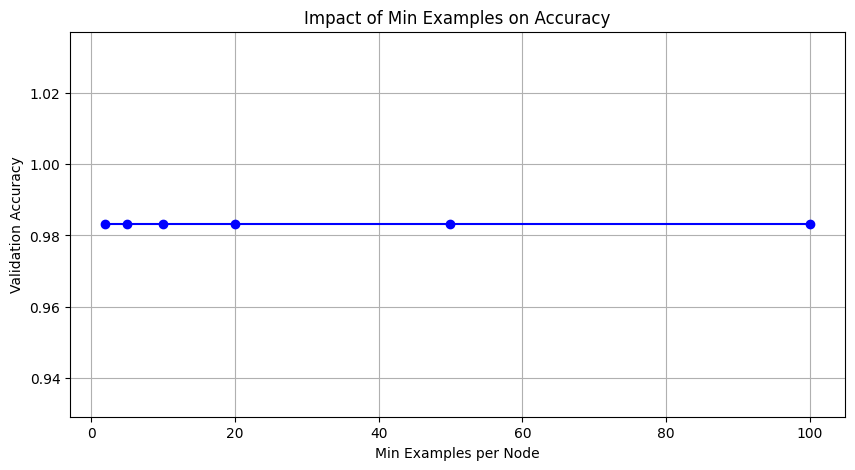

In [15]:
min_examples_range = [2, 5, 10, 20, 50, 100]
accuracies_min_examples = []
for min_examples in min_examples_range:
    model = train_rf_with_params(train_dataset, val_dataset, num_trees=30, max_depth=7, min_examples=min_examples)
    val_accuracy = model.evaluate(val_dataset, return_dict=True)['accuracy']
    accuracies_min_examples.append(val_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(min_examples_range, accuracies_min_examples, marker='o', linestyle='-', color='b')
plt.xlabel("Min Examples per Node")
plt.ylabel("Validation Accuracy")
plt.title("Impact of Min Examples on Accuracy")
plt.grid(True)
plt.show()

Use /tmp/tmpco3urkbt as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8398
Use /tmp/tmpp_lyhj66 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9123
Use /tmp/tmp4snhekr9 as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpagzxvtnv as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Use /tmp/tmpojuy4t9o as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [========================

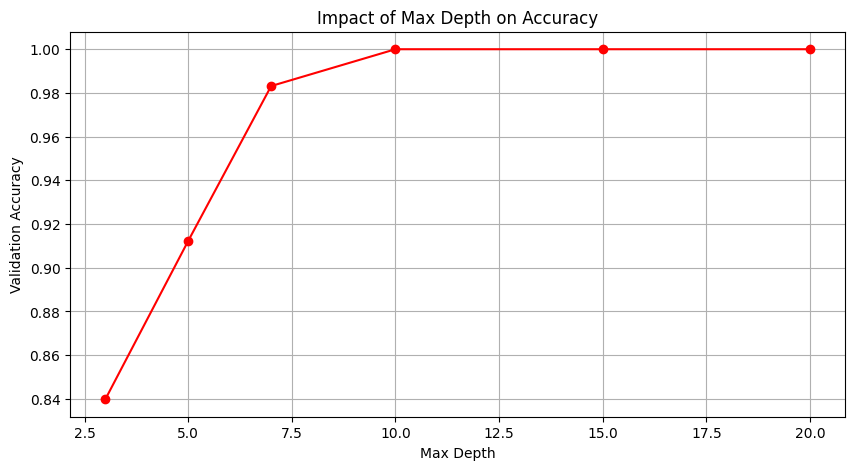

In [16]:
max_depth_range = [3, 5, 7, 10, 15, 20]
accuracies_max_depth = []

for max_depth in max_depth_range:
    model = train_rf_with_params(train_dataset, val_dataset, num_trees=30, max_depth=max_depth, min_examples=10)
    val_accuracy = model.evaluate(val_dataset, return_dict=True)['accuracy']
    accuracies_max_depth.append(val_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, accuracies_max_depth, marker='o', linestyle='-', color='r')
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Impact of Max Depth on Accuracy")
plt.grid(True)
plt.show()

# Combine depth and number of trees to see the optimal results 

Use /tmp/tmp8r5_gbpm as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8398
Use /tmp/tmp9m0sbp6g as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8398
Use /tmp/tmpi5k4ujef as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.8398
Use /tmp/tmpas2o4s6i as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9123
Use /tmp/tmpwwm_qc0c as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [========================

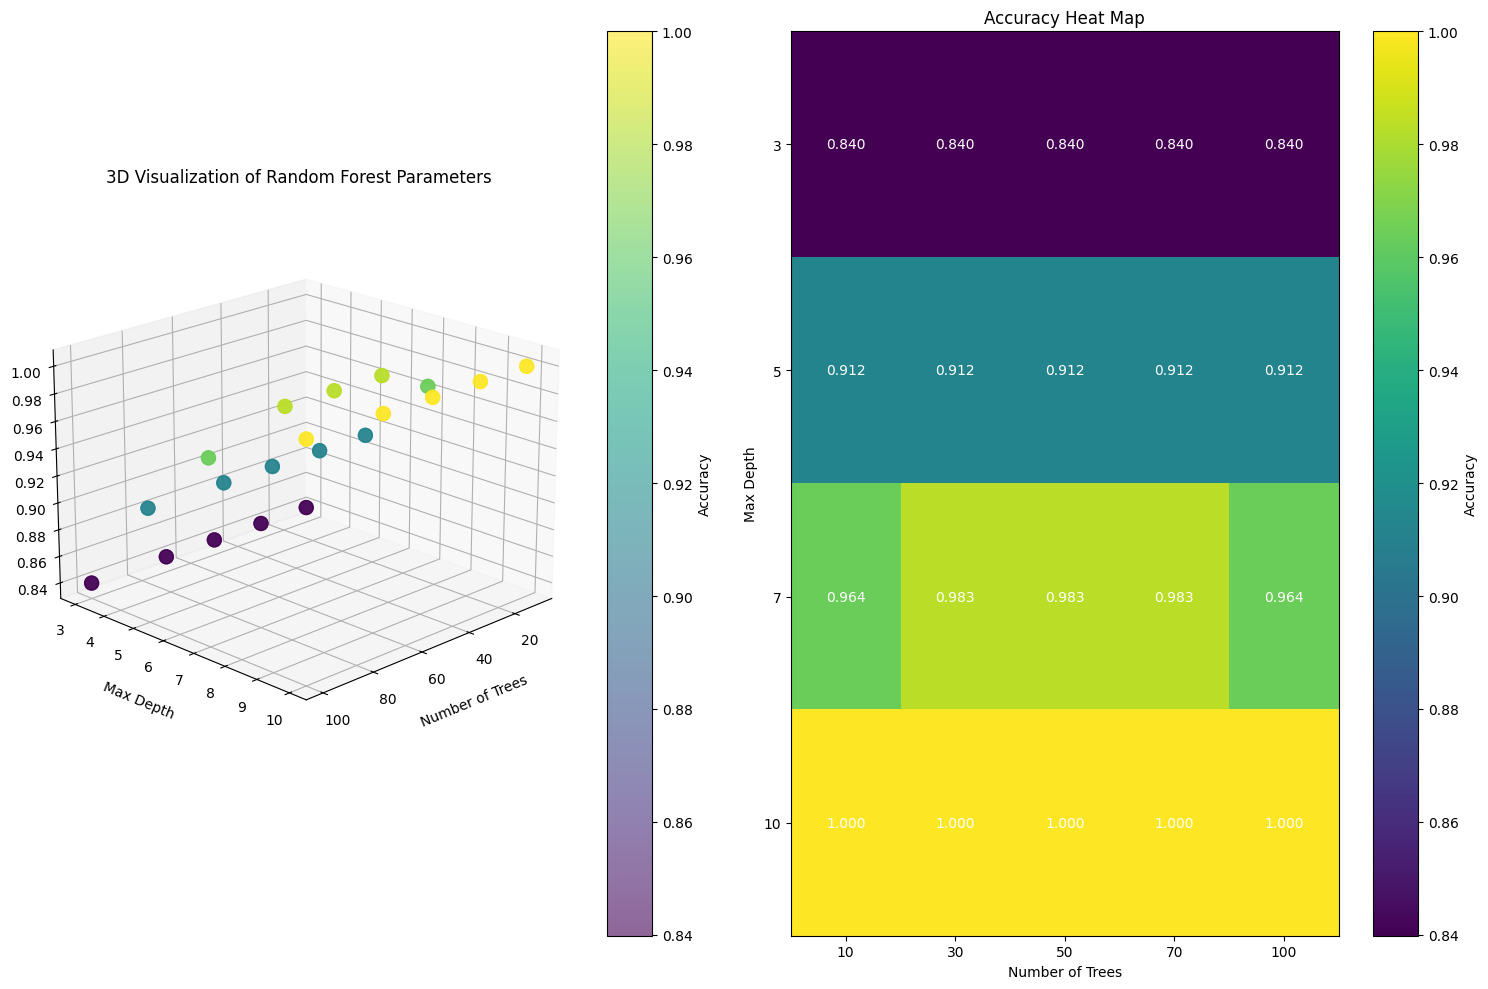

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

num_trees_range = [10, 30, 50, 70, 100]
max_depth_range = [3, 5, 7, 10]
min_examples_range = [2, 5, 10]

results = []

for num_trees in num_trees_range:
    for max_depth in max_depth_range:
        for min_examples in min_examples_range:
            model = train_rf_with_params(train_dataset, val_dataset, num_trees, max_depth, min_examples)
            val_accuracy = model.evaluate(val_dataset, return_dict=True)['accuracy']
            results.append((num_trees, max_depth, min_examples, val_accuracy))

results_df = pd.DataFrame(results, columns=["num_trees", "max_depth", "min_examples", "accuracy"])

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(results_df["num_trees"], results_df["max_depth"], results_df["accuracy"],
                     c=results_df["accuracy"], cmap='viridis', s=100, alpha=0.6)

ax1.set_xlabel("Number of Trees", labelpad=10)
ax1.set_ylabel("Max Depth", labelpad=10)
ax1.set_zlabel("Accuracy", labelpad=10)
ax1.set_title("3D Visualization of Random Forest Parameters", pad=20)

plt.colorbar(scatter, ax=ax1, label='Accuracy')
ax1.view_init(elev=20, azim=45)

ax2 = fig.add_subplot(122)
pivot_table = results_df.pivot_table(values='accuracy', index='max_depth', columns='num_trees', aggfunc='mean')

heatmap = ax2.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(heatmap, ax=ax2, label='Accuracy')

ax2.set_xlabel("Number of Trees")
ax2.set_ylabel("Max Depth")
ax2.set_title("Accuracy Heat Map")

ax2.set_xticks(range(len(num_trees_range)))
ax2.set_xticklabels(num_trees_range)

ax2.set_yticks(range(len(max_depth_range)))
ax2.set_yticklabels(max_depth_range)

for i in range(len(max_depth_range)):
    for j in range(len(num_trees_range)):
        ax2.text(j, i, f'{pivot_table.iloc[i, j]:.3f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [10]:
# learning curves

Use /tmp/tmp7_9jup1q as temporary training directory
Num validation examples: tf.Tensor(85903, shape=(), dtype=int32)
84/84 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.9606
Use /tmp/tmp5u8s7tuh as temporary training directory
Num validation examples: tf.Tensor(85903, shape=(), dtype=int32)
84/84 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9605
Use /tmp/tmppcfwbzyv as temporary training directory
Num validation examples: tf.Tensor(85903, shape=(), dtype=int32)
84/84 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 0.9596
Use /tmp/tmphguqfz7w as temporary training directory
Num validation examples: tf.Tensor(85902, shape=(), dtype=int32)
84/84 [==============================] - 1s 10ms/step - loss: 0.0000e+00 - accuracy: 0.9599
Use /tmp/tmpujus3mcs as temporary training directory
Num validation examples: tf.Tensor(85902, shape=(), dtype=int32)
84/84 [==============================] - 1s

<ipython-input-13-797ccd3c96a1>:68: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert valid dates, set errors as NaT
<ipython-input-13-797ccd3c96a1>:68: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert valid dates, set errors as NaT
<ipython-input-13-797ccd3c96a1>:68: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert valid dates, set errors as NaT


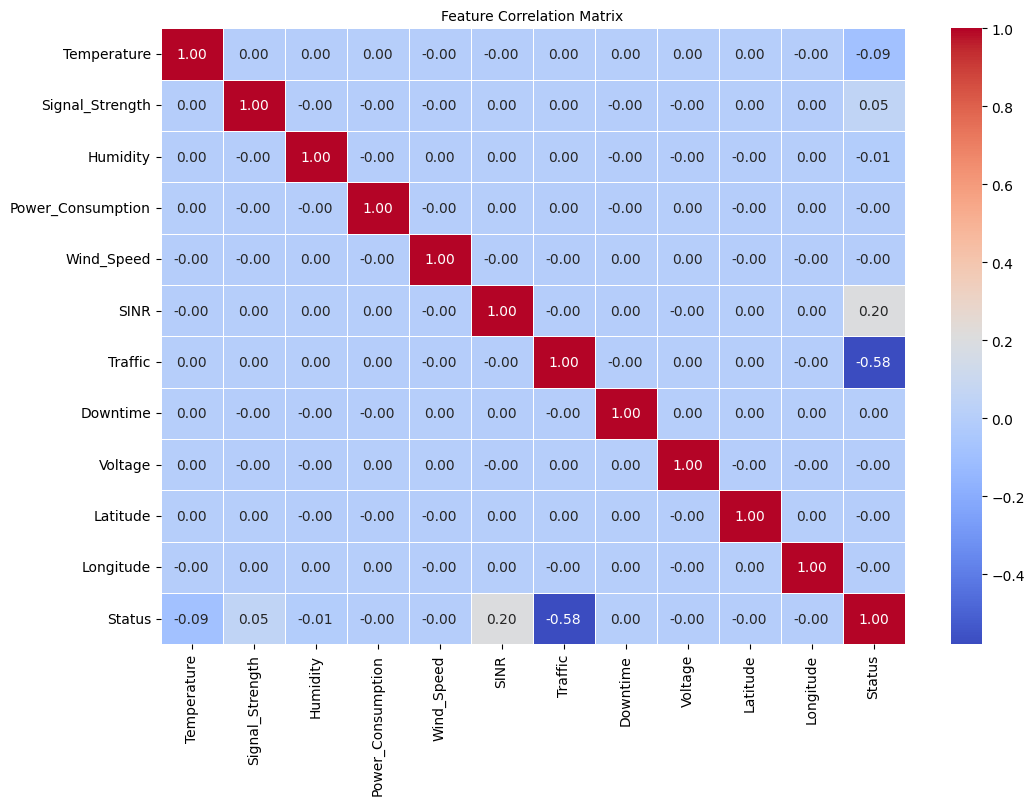

132/132 [==============================] - 1s 10ms/step
Confusion Matrix:
[[80190   226   263]
 [    0 10889     0]
 [    0  1744 40911]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     80679
           1       0.85      1.00      0.92     10889
           2       0.99      0.96      0.98     42655

    accuracy                           0.98    134223
   macro avg       0.95      0.98      0.96    134223
weighted avg       0.99      0.98      0.98    134223


Final Recommendations:
Optimal number of trees: 30
Cross-validation accuracy: 0.9601
Test set accuracy: 0.9834
Check correlation matrix for data leakage insights.
Use /tmp/tmpv5r8zpnv as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9610
Use /tmp/tmpq1_bnkuz as temporary training directory
Num validation examples: tf.

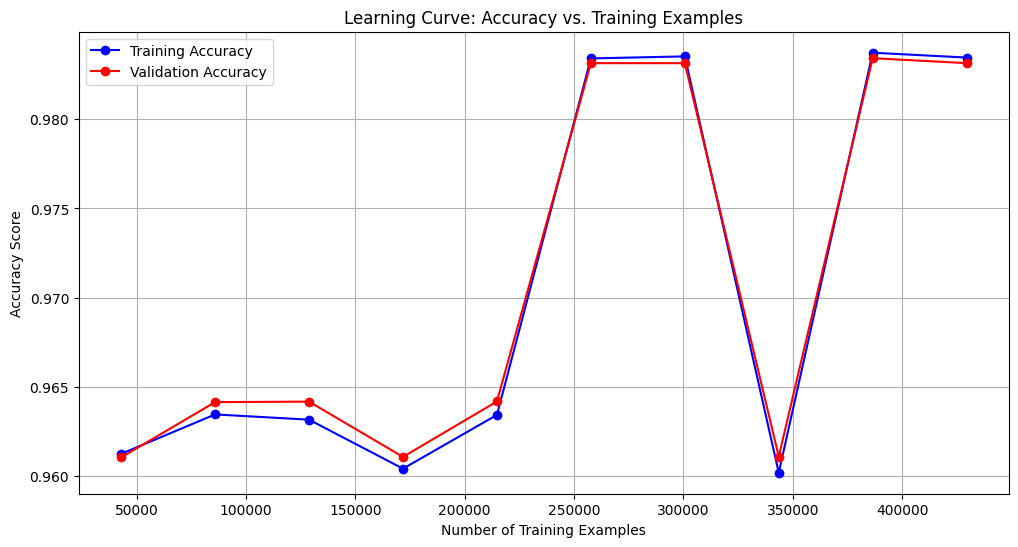

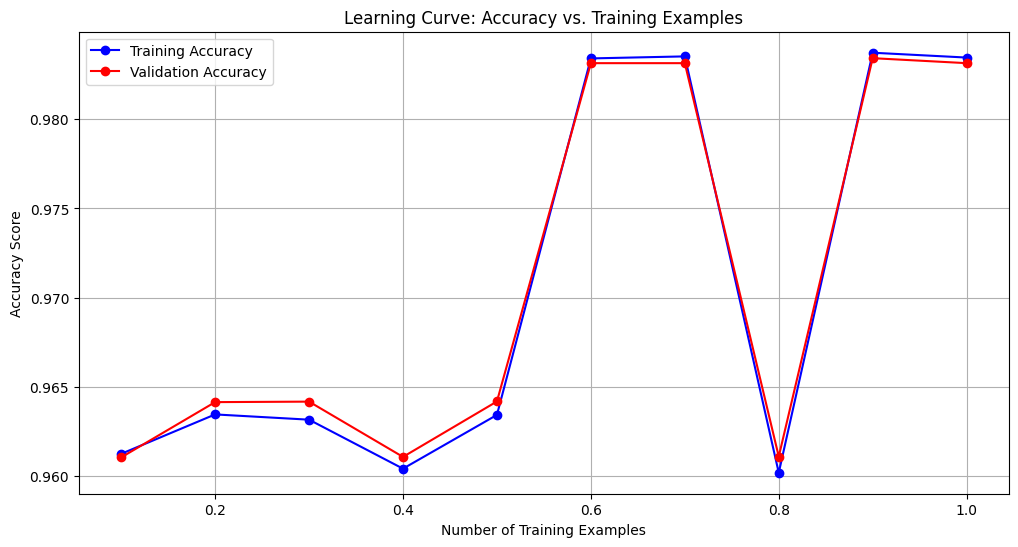

Use /tmp/tmpj9kniprg as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.9642
Use /tmp/tmpq8y5sxar as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 2s 15ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpxptqps5j as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpl9r9haya as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [==============================] - 1s 10ms/step - loss: 0.0000e+00 - accuracy: 0.9832
Use /tmp/tmpr_89tpqq as temporary training directory
Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
105/105 [======================

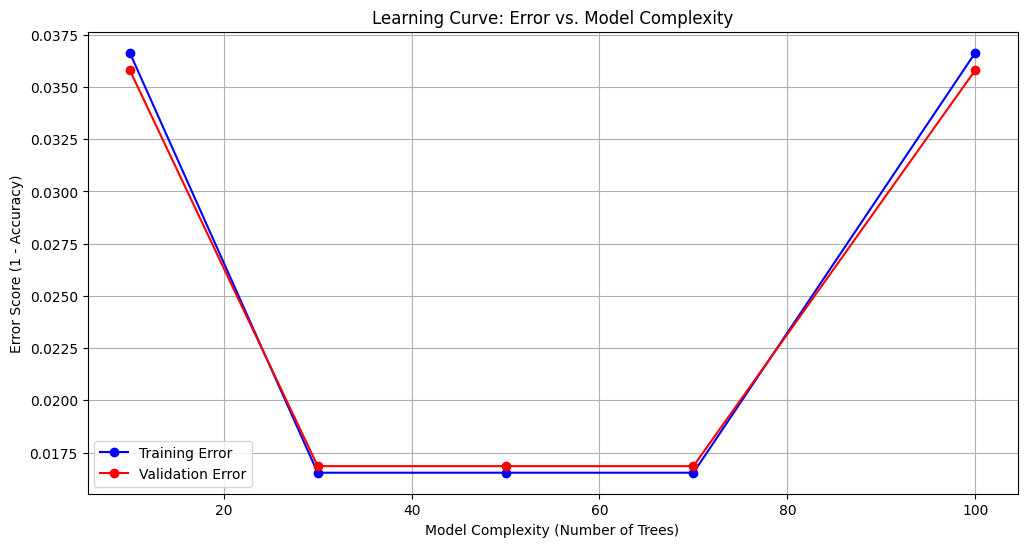

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the data
df = pd.read_csv("/content/mobilis_data_cleaned.csv")
df['Status'] = LabelEncoder().fit_transform(df['Status'])

# Define features and target
features = ['SINR', 'Signal_Strength', 'Traffic', 'Temperature', 'Humidity']
X = df[features]
y = df['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(1024)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1024)

# Function to train model
def train_rf_with_params(train_dataset, val_dataset, num_trees, max_depth, min_examples):
    model = tfdf.keras.RandomForestModel(
        num_trees=num_trees, max_depth=max_depth, min_examples=min_examples,
        task=tfdf.keras.Task.CLASSIFICATION, random_seed=42
    )
    model.compile(metrics=["accuracy"])
    model.fit(train_dataset, validation_data=val_dataset, verbose=0)
    return model

# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Convert to TensorFlow dataset
    train_ds = tf.data.Dataset.from_tensor_slices((X_cv_train, y_cv_train)).batch(1024)
    val_ds = tf.data.Dataset.from_tensor_slices((X_cv_val, y_cv_val)).batch(1024)

    # Train model
    model = train_rf_with_params(train_ds, val_ds, num_trees=30, max_depth=7, min_examples=2)

    # Evaluate model
    val_accuracy = model.evaluate(val_ds, return_dict=True)['accuracy']
    cv_accuracies.append(val_accuracy)

# Print cross-validation results
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracies):.4f} +/- {np.std(cv_accuracies):.4f}")

# Data Leakage Check
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert date columns to datetime format
for col in non_numeric_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert valid dates, set errors as NaT
    except:
        pass

# Drop columns that are still non-numeric after conversion
df = df.drop(columns=[col for col in df.select_dtypes(exclude=['number']).columns if col != 'target_variable'])

correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=10)
plt.show()

# Final Model Evaluation
best_model = models[num_trees_range[np.argmax(accuracies)]]
y_pred = best_model.predict(test_dataset).argmax(axis=1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Final Recommendations
print("\nFinal Recommendations:")
print(f"Optimal number of trees: {num_trees_range[np.argmax(accuracies)]}")
print(f"Cross-validation accuracy: {np.mean(cv_accuracies):.4f}")
print(f"Test set accuracy: {np.mean(y_pred == y_test):.4f}")
print("Check correlation matrix for data leakage insights.")

# 🚀 Learning Curve (Accuracy Score vs. Training Examples)
train_sizes = np.linspace(0.1, 1.0, 10)
train_accuracies = []
val_accuracies = []

for train_size in train_sizes:
    if train_size < 1.0:
       X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    else:
       X_train_subset, y_train_subset = X_train, y_train  # Use full training set when train_size=1.0

    # Convert to TensorFlow dataset
    train_ds = tf.data.Dataset.from_tensor_slices((X_train_subset, y_train_subset)).batch(1024)

    # Train the model
    model = train_rf_with_params(train_ds, val_dataset, num_trees=50, max_depth=7, min_examples=10)

    # Evaluate
    train_accuracy = model.evaluate(train_ds, return_dict=True)['accuracy']
    val_accuracy = model.evaluate(val_dataset, return_dict=True)['accuracy']

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot Learning Curve
plt.figure(figsize=(12, 6))
plt.plot(train_sizes * len(X_train), train_accuracies, 'o-', label="Training Accuracy", color='blue')
plt.plot(train_sizes * len(X_train), val_accuracies, 'o-', label="Validation Accuracy", color='red')
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve: Accuracy vs. Training Examples")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_accuracies, 'o-', label="Training Accuracy", color='blue')
plt.plot(train_sizes, val_accuracies, 'o-', label="Validation Accuracy", color='red')
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve: Accuracy vs. Training Examples")
plt.legend()
plt.grid(True)
plt.show()

#  Learning Curve (Error Score vs. Model Complexity)
train_errors = []
val_errors = []

for n_trees in num_trees_range:
    model = train_rf_with_params(train_dataset, val_dataset, n_trees, max_depth=7, min_examples=10)
    train_loss, train_acc = model.evaluate(train_dataset, return_dict=True).values()
    val_loss, val_acc = model.evaluate(val_dataset, return_dict=True).values()
    train_errors.append(1 - train_acc)  # Error = 1 - Accuracy
    val_errors.append(1 - val_acc)      # Error = 1 - Accuracy

plt.figure(figsize=(12, 6))
plt.plot(num_trees_range, train_errors, 'o-', label="Training Error", color='blue')
plt.plot(num_trees_range, val_errors, 'o-', label="Validation Error", color='red')
plt.xlabel("Model Complexity (Number of Trees)")
plt.ylabel("Error Score (1 - Accuracy)")
plt.title("Learning Curve: Error vs. Model Complexity")
plt.legend()
plt.grid(True)
plt.show()

# loading the best model with the minimal features and best parameters

In [7]:
best_features = features_with_humidity

train_ds, val_ds, test_ds, y_test = prepare_data(df,best_features)

with strategy.scope():
    final_model = tfdf.keras.RandomForestModel(
        num_trees=30,
        max_depth=7,
        min_examples=2,
        task=tfdf.keras.Task.CLASSIFICATION,
        random_seed=42
    )
    final_model.compile(metrics=["accuracy"])


final_model.fit(train_ds, validation_data=val_ds, verbose=1, class_weight=class_weights_dict)

model_path = "/content/random_forest_with_humidity"
final_model.save(model_path)
print(f"Model saved to {model_path}")

Use /tmp/tmpu06o6r6j as temporary training directory
Reading training dataset...


Training dataset read in 0:00:01.438618. Found 429513 examples.
Reading validation dataset...


Num validation examples: tf.Tensor(107379, shape=(), dtype=int32)
Validation dataset read in 0:00:00.972423. Found 107379 examples.
Training model...
Model trained in 0:00:14.843864
Compiling model...
Model compiled.
Model saved to /content/random_forest_with_humidity
